# FiveThirtyEight style sheet
## https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session


In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM
###Object Relational Mapper, commonly referred to as ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
#set up a simple database that we'll use later on.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results.all())
???

# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
#print(results.all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print("----------------------")
# print(df)
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data


----------------------
      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28     

In [16]:
#df = df.to_string(index=False)
#df

'      date  precipitation\n2016-08-23           0.00\n2016-08-23            NaN\n2016-08-23           1.79\n2016-08-23           0.05\n2016-08-23           0.15\n2016-08-23           0.70\n2016-08-23           0.02\n2016-08-24           0.08\n2016-08-24           2.15\n2016-08-24           2.28\n2016-08-24            NaN\n2016-08-24           1.45\n2016-08-24           1.22\n2016-08-24           2.15\n2016-08-25           0.08\n2016-08-25           0.00\n2016-08-25           0.21\n2016-08-25           0.06\n2016-08-25           0.00\n2016-08-25           0.11\n2016-08-25           0.08\n2016-08-26           0.03\n2016-08-26           0.01\n2016-08-26           0.00\n2016-08-26           0.04\n2016-08-26           0.02\n2016-08-26           0.00\n2016-08-27           0.18\n2016-08-27           0.12\n2016-08-27           0.00\n2016-08-27           0.00\n2016-08-27           0.02\n2016-08-27            NaN\n2016-08-28           0.60\n2016-08-28           0.14\n2016-08-28           0.01\n

<AxesSubplot:xlabel='date'>

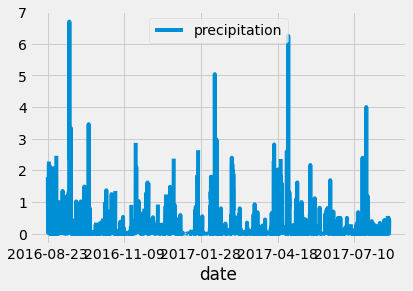

In [19]:
df.plot()
# df.describe()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Weather Station Analysis

In [13]:
# How many stations are available in this dataset?
session.query()
session.query(func.count(Station.station))
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
df = pd.DataFrame(results, columns=['tobs'])
print(df)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

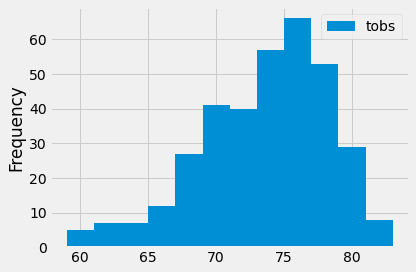

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()


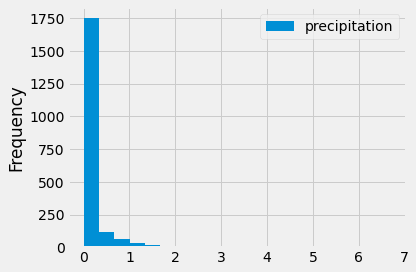

In [22]:
df.plot.hist(bins=20)
plt.tight_layout()

# Challenge

# Set Up Flask and Create a Route

In [ ]:
# pip install flask

In [24]:
from flask import Flask

In [25]:
@app.route('/')
def hello_world():
    return 'Hello world'

NameError: name 'app' is not defined

In [26]:
export FLASK_APP=app.py

SyntaxError: invalid syntax (1527676619.py, line 1)

In [27]:
flask run

SyntaxError: invalid syntax (645207457.py, line 1)

# Set Up the Database

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

In [ ]:
Measurement = Base.classes.measurement
Station = Base.classes.station

# create a session link from Python
session = Session(engine)


In [29]:
# define app for our Flask applicatio
app = Flask(__name__)

import app

print("example __name__ = %s", __name__)

if __name__ == "__main__":
    print("example is being run directly.")
else:
    print("example is being imported")

SyntaxError: invalid syntax (app.py, line 9)

# 9.5.2 Create the Welcome Route